In [1]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version = 1, as_frame = False)

C:\Users\PcSrv\anaconda3\envs\homl3\lib\site-packages\sklearn\datasets\_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [2]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
X_train = mnist['data'][:60000]
X_test = mnist['data'][60000:]
y_train = mnist['target'][:60000]
y_test = mnist['target'][60000:]

In [4]:
from sklearn.ensemble import RandomForestClassifier
import time

rf_clf = RandomForestClassifier(n_estimators=100, n_jobs = -1, random_state = 42)
t0 = time.time()
rf_clf.fit(X_train, y_train)
t1 = time.time()

In [5]:
print('Training took {:.2f}s'.format(t1 - t0))

Training took 30.74s


In [6]:
from sklearn.metrics import accuracy_score

y_pred = rf_clf.predict(X_test)
print(accuracy_score(y_pred, y_test))

0.9705


In [7]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 0.95, random_state = 42)
X_reduced = pca.fit_transform(X_train)

In [8]:
rf_clf2 = RandomForestClassifier(n_estimators=100, n_jobs = -1, random_state = 42)
t0 = time.time()
rf_clf2.fit(X_reduced, y_train)
t1 = time.time()

In [9]:
print('Training took {:.2f}s'.format(t1 - t0))

Training took 130.87s


In [10]:
y_pred2 = rf_clf2.predict(pca.transform(X_test))
print(accuracy_score(y_pred2, y_test))

0.9481


In [11]:
import numpy as np

np.random.seed(42)
idx = np.random.permutation(60000)[:10000]

X = mnist['data'][idx]
y = mnist['target'][idx]

In [12]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components = 2, random_state = 42)
X_reduced = tsne.fit_transform(X)

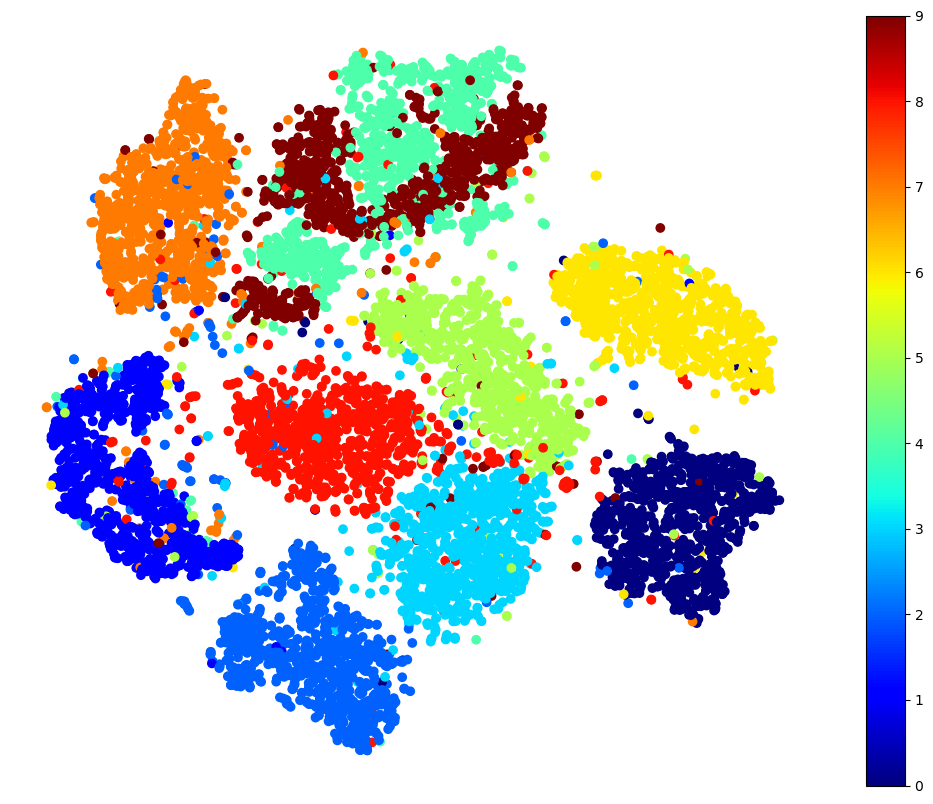

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize = (13, 10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c = y.astype(int), cmap ='jet')
plt.axis('off')
plt.colorbar()
plt.show()

In [43]:
from sklearn.preprocessing import MinMaxScaler
from matplotlib.offsetbox import AnnotationBbox, OffsetImage

def plot_digits(X, y, min_distance=0.05, images=None, figsize=(13, 10)):
    # Let's scale the input features so that they range from 0 to 1
    X_normalized = MinMaxScaler().fit_transform(X)
    # Now we create the list of coordinates of the digits plotted so far.
    # We pretend that one is already plotted far away at the start, to
    # avoid `if` statements in the loop below
    neighbors = np.array([[10., 10.]])
    # The rest should be self-explanatory
    plt.figure(figsize=figsize)
    cmap = plt.get_cmap("jet")
    digits = np.unique(y)
    for digit in digits:
        plt.scatter(X_normalized[y == digit, 0], X_normalized[y == digit, 1], c=[cmap(digit / 9)])
    plt.axis("off")
    ax = plt.gcf().gca()  # get current axes in current figure
    for index, image_coord in enumerate(X_normalized):
        closest_distance = np.linalg.norm(neighbors - image_coord, axis=1).min()
        if closest_distance > min_distance:
            neighbors = np.r_[neighbors, [image_coord]]
            if images is None:
                plt.text(image_coord[0], image_coord[1], str(int(y[index])),
                         color=cmap(y[index] / 9), fontdict={"weight": "bold", "size": 16})
            else:
                image = images[index].reshape(28, 28)
                imagebox = AnnotationBbox(OffsetImage(image, cmap="binary"), image_coord)
                ax.add_artist(imagebox)

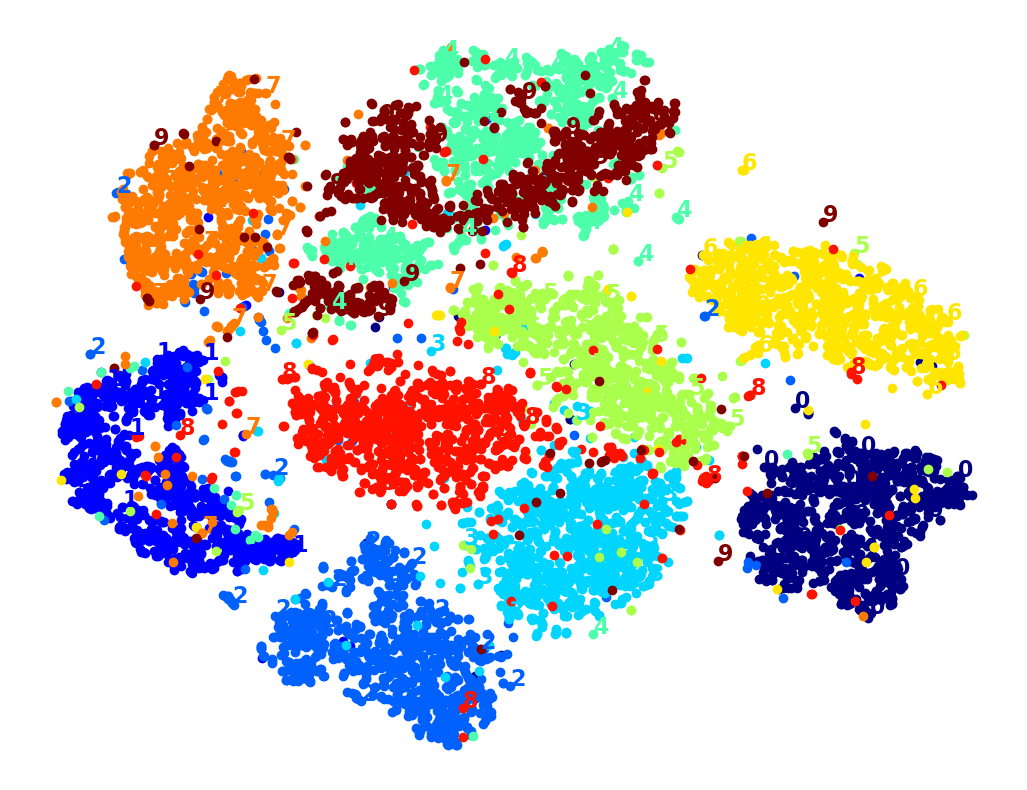

In [44]:
plot_digits(X_reduced, y.astype(int))

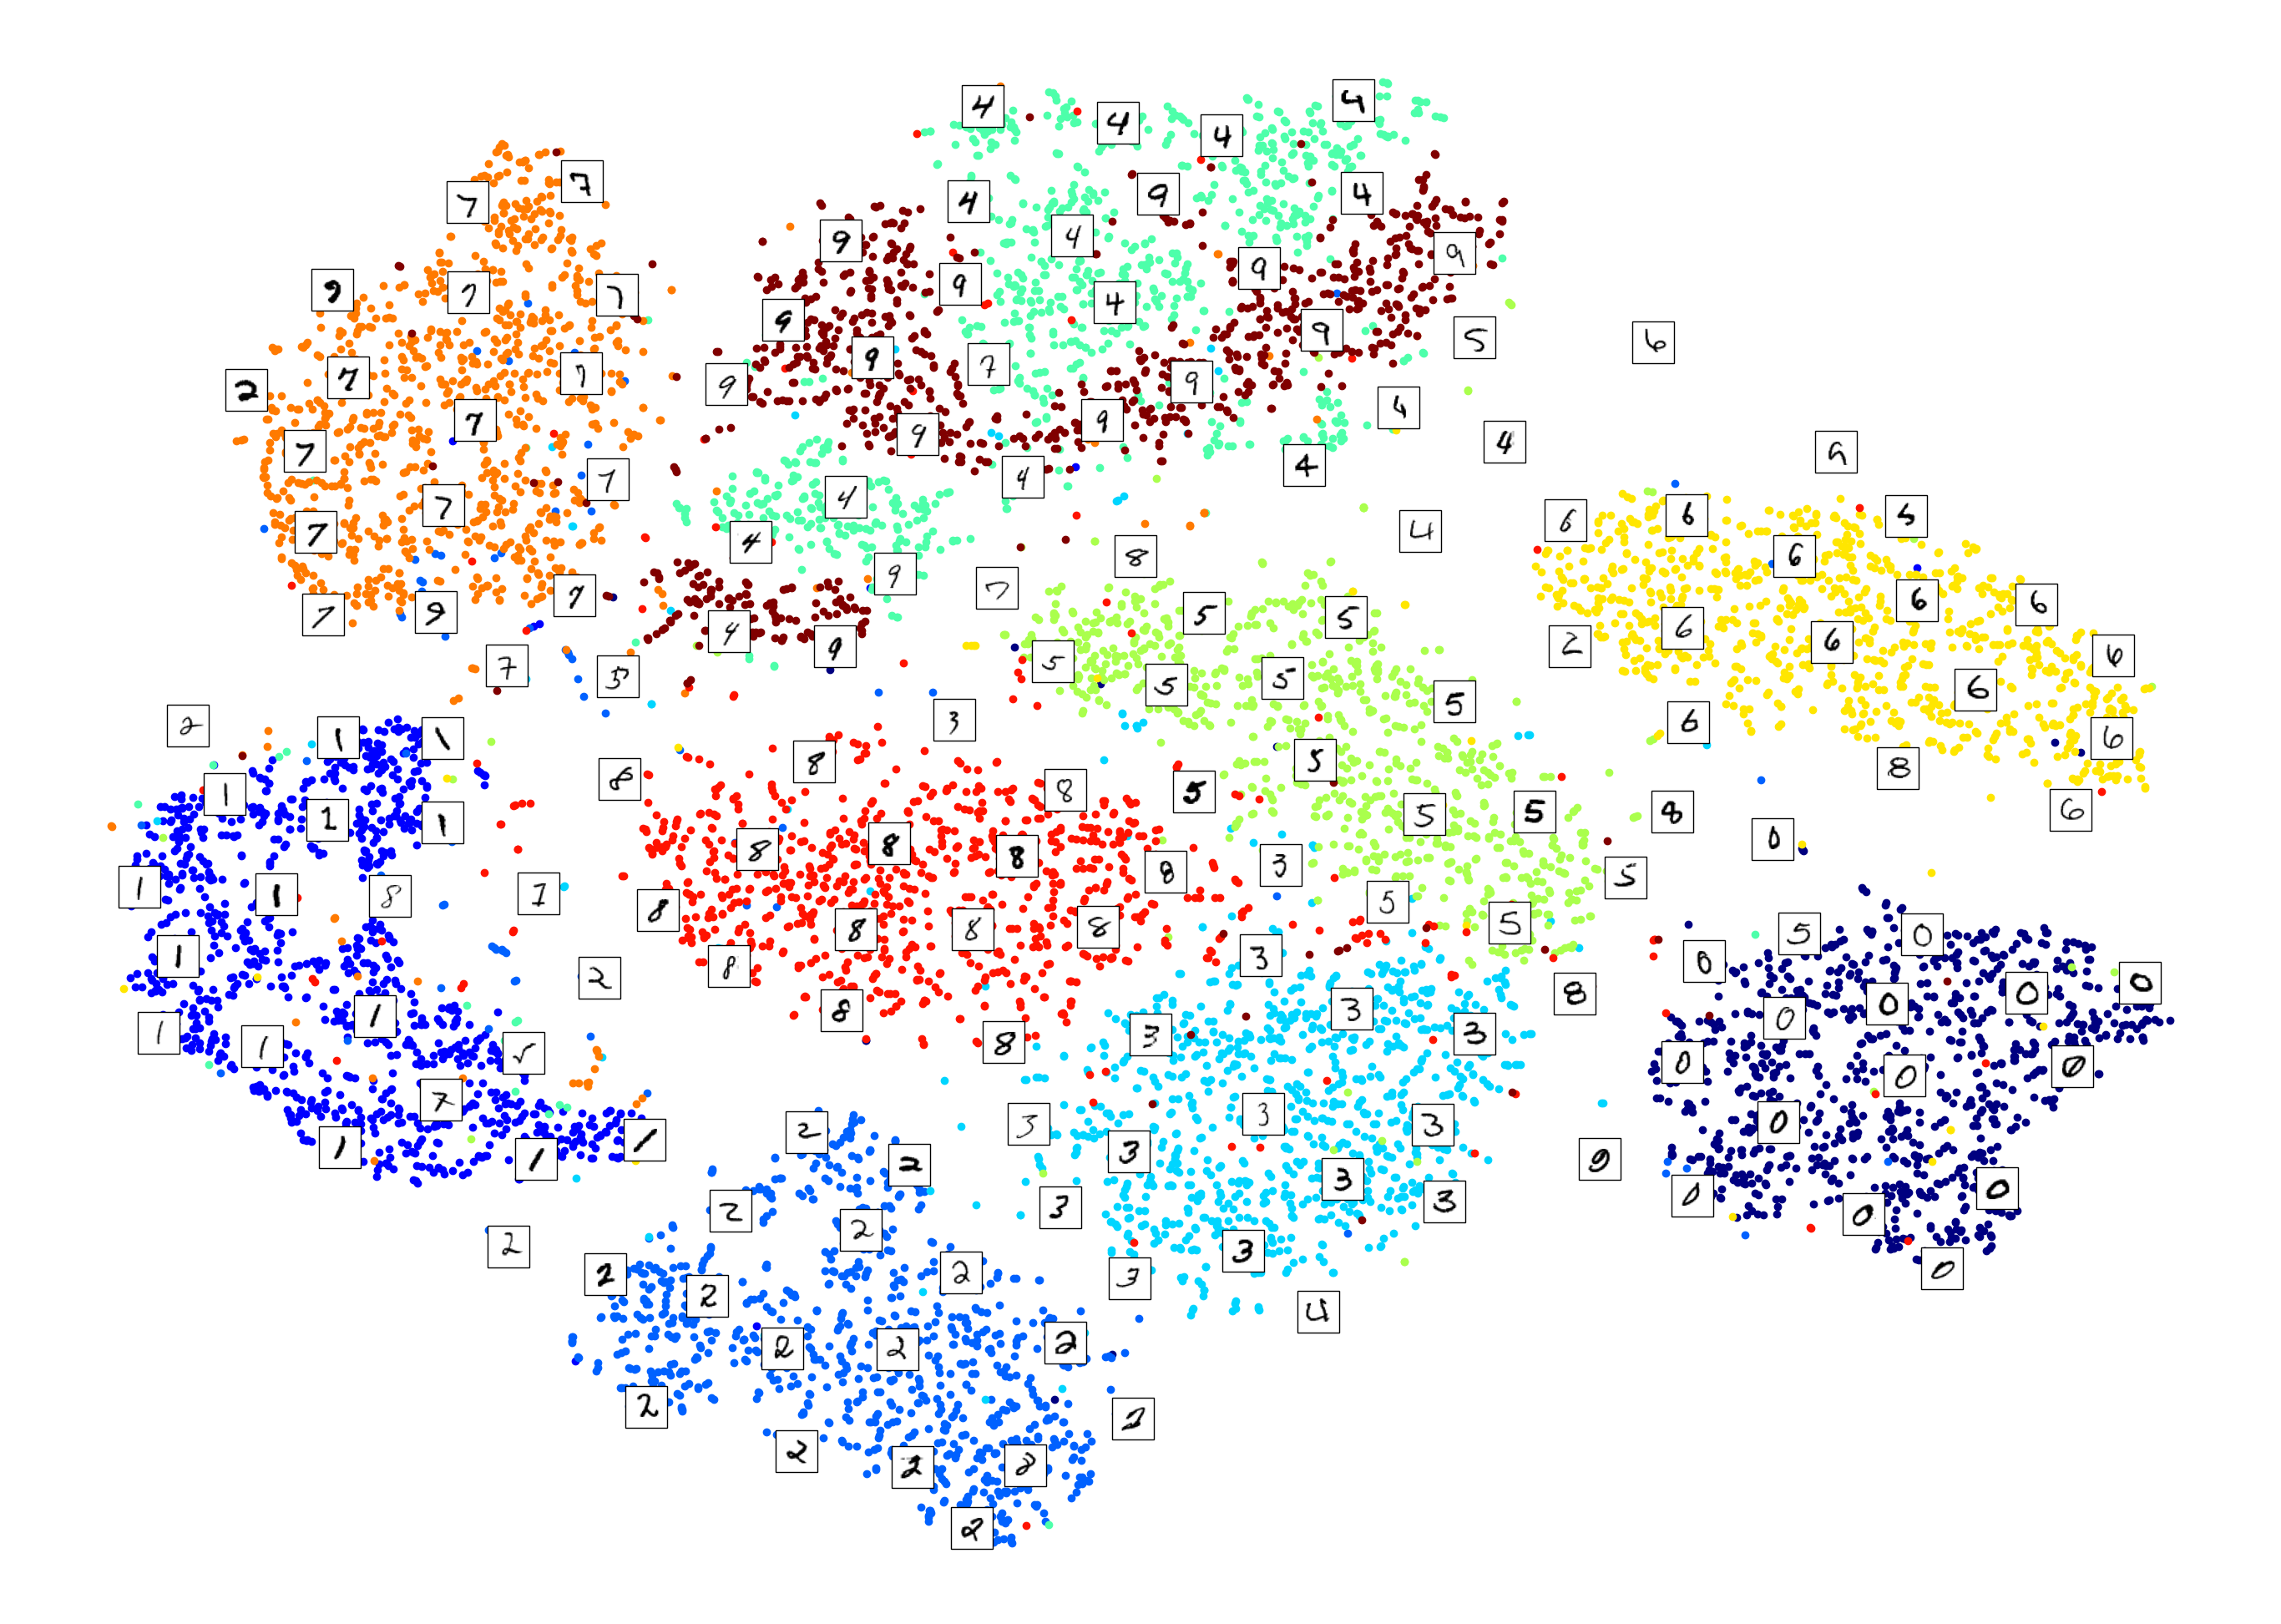

In [46]:
plot_digits(X_reduced, y.astype(int), images=X, figsize=(35, 25))

PCA Took 0.28s


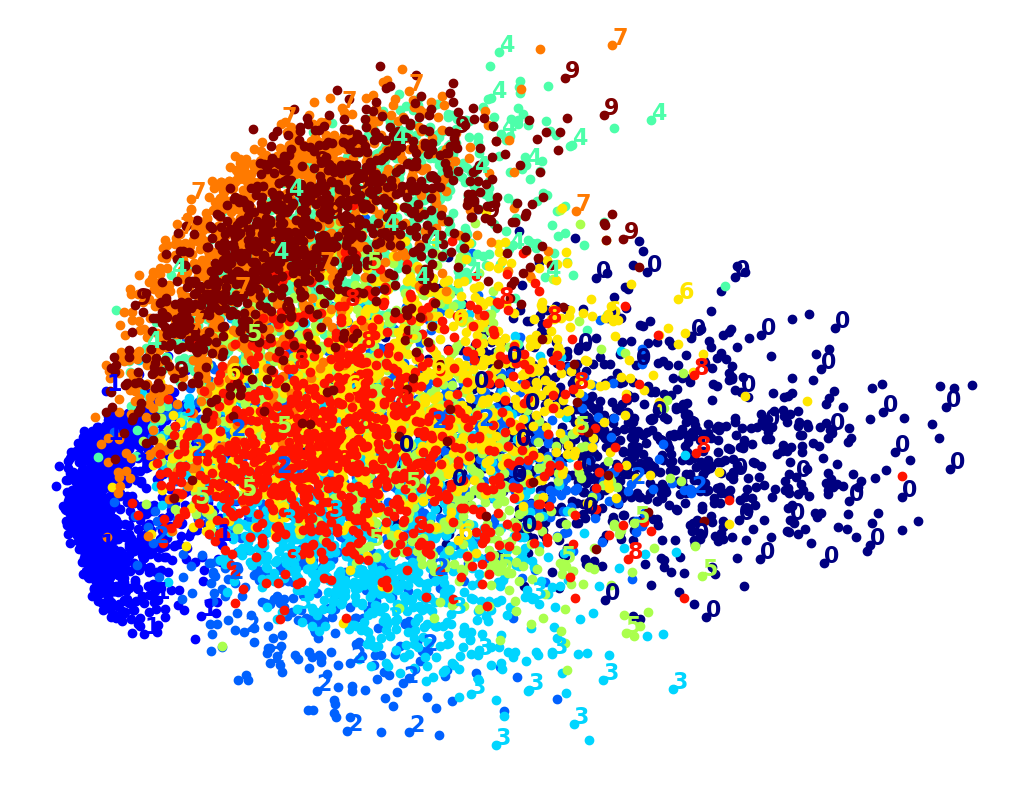

In [50]:
t0 = time.time()
X_pca_reduced = PCA(n_components = 2, random_state =42)
X_pca_reduced = X_pca_reduced.fit_transform(X)
t1 = time.time()
print('PCA Took {:.2f}s'.format(t1 - t0))
plot_digits(X_pca_reduced, y.astype(int))
plt.show()

LLE took 13.8s.


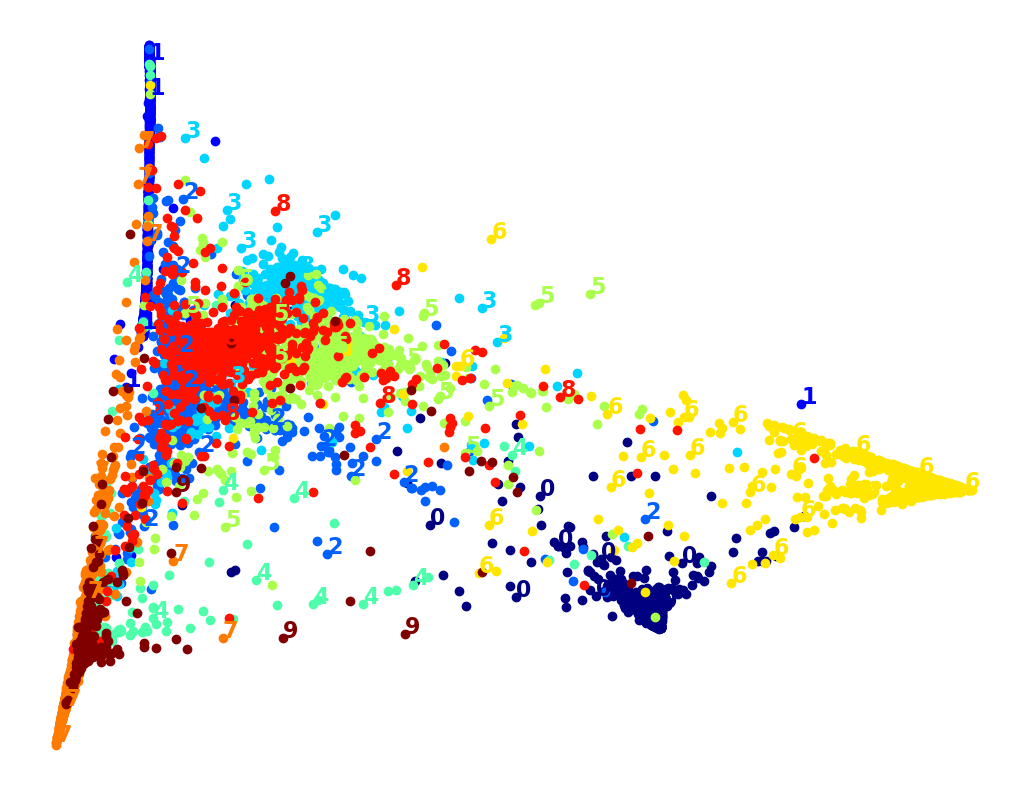

In [51]:
from sklearn.manifold import LocallyLinearEmbedding

t0 = time.time()
X_lle_reduced = LocallyLinearEmbedding(n_components=2, random_state=42).fit_transform(X)
t1 = time.time()
print("LLE took {:.1f}s.".format(t1 - t0))
plot_digits(X_lle_reduced, y.astype(int))
plt.show()

PCA+LLE took 15.3s.


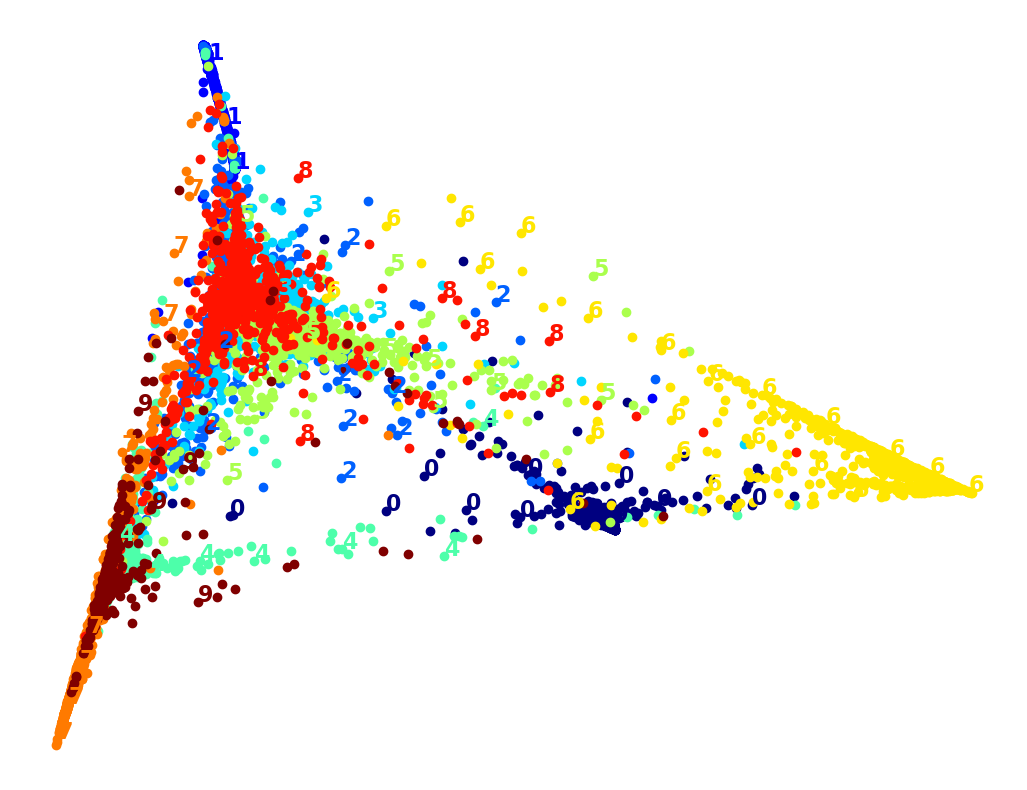

In [52]:
from sklearn.pipeline import Pipeline

pca_lle = Pipeline([('pca', PCA(n_components=0.95, random_state=42)),
                    ('lle', LocallyLinearEmbedding(n_components=2, random_state=42)),])

t0 = time.time()
X_pca_lle_reduced = pca_lle.fit_transform(X)
t1 = time.time()
print("PCA+LLE took {:.1f}s.".format(t1 - t0))
plot_digits(X_pca_lle_reduced, y.astype(int))
plt.show()

C:\Users\PcSrv\anaconda3\envs\homl3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


MDS took 484.8s (on just 2,000 MNIST images instead of 10,000).


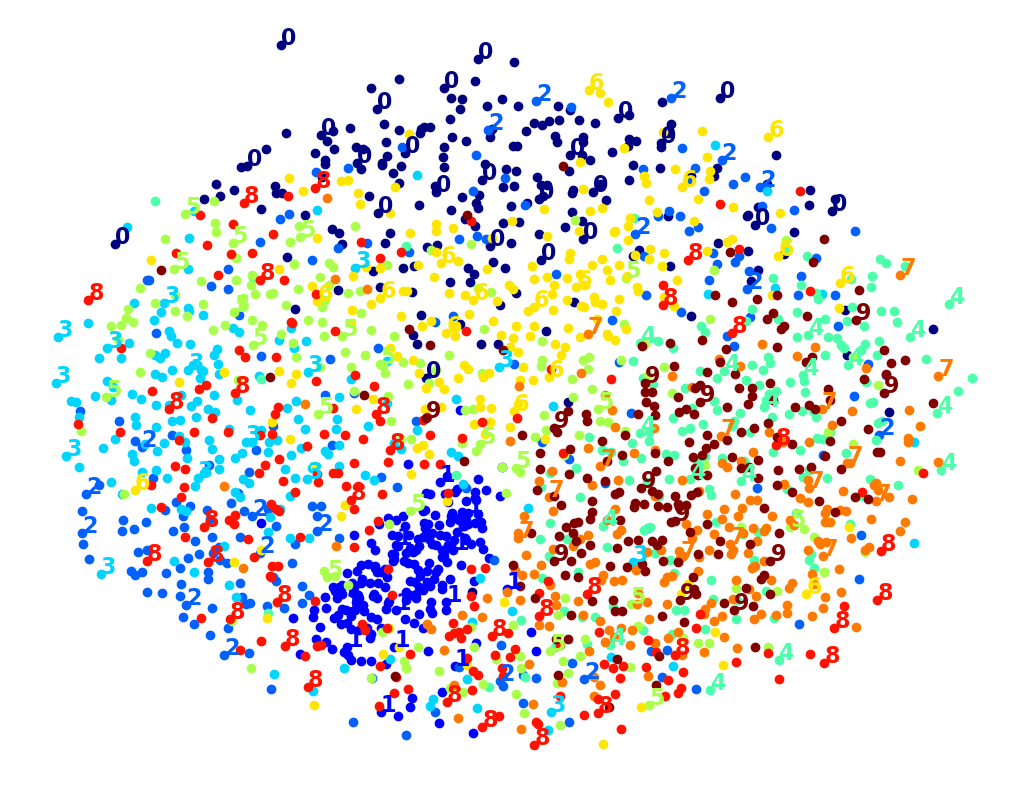

In [53]:
from sklearn.manifold import MDS

t0 = time.time()
X_mds_reduced = MDS(n_components=2, random_state=42).fit_transform(X[:2000])
t1 = time.time()
print("MDS took {:.1f}s (on just 2,000 MNIST images instead of 10,000).".format(t1 - t0))
plot_digits(X_mds_reduced, y[:2000].astype(int))
plt.show()

C:\Users\PcSrv\anaconda3\envs\homl3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


PCA+MDS took 590.9s (on 2,000 MNIST images).


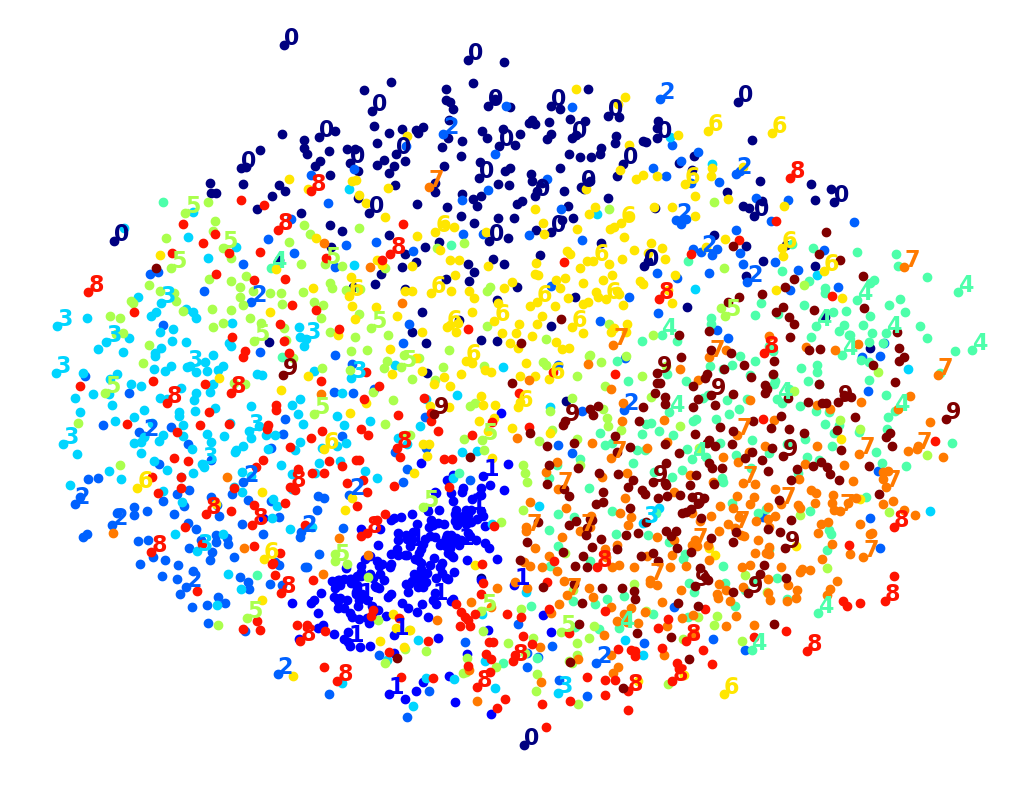

In [54]:
pca_mds = Pipeline([('pca', PCA(n_components=0.95, random_state=42)),
                    ('mds', MDS(n_components=2, random_state=42)),])

t0 = time.time()
X_pca_mds_reduced = pca_mds.fit_transform(X[:2000])
t1 = time.time()
print("PCA+MDS took {:.1f}s (on 2,000 MNIST images).".format(t1 - t0))
plot_digits(X_pca_mds_reduced, y[:2000].astype(int))
plt.show()

LDA took 7.5s.


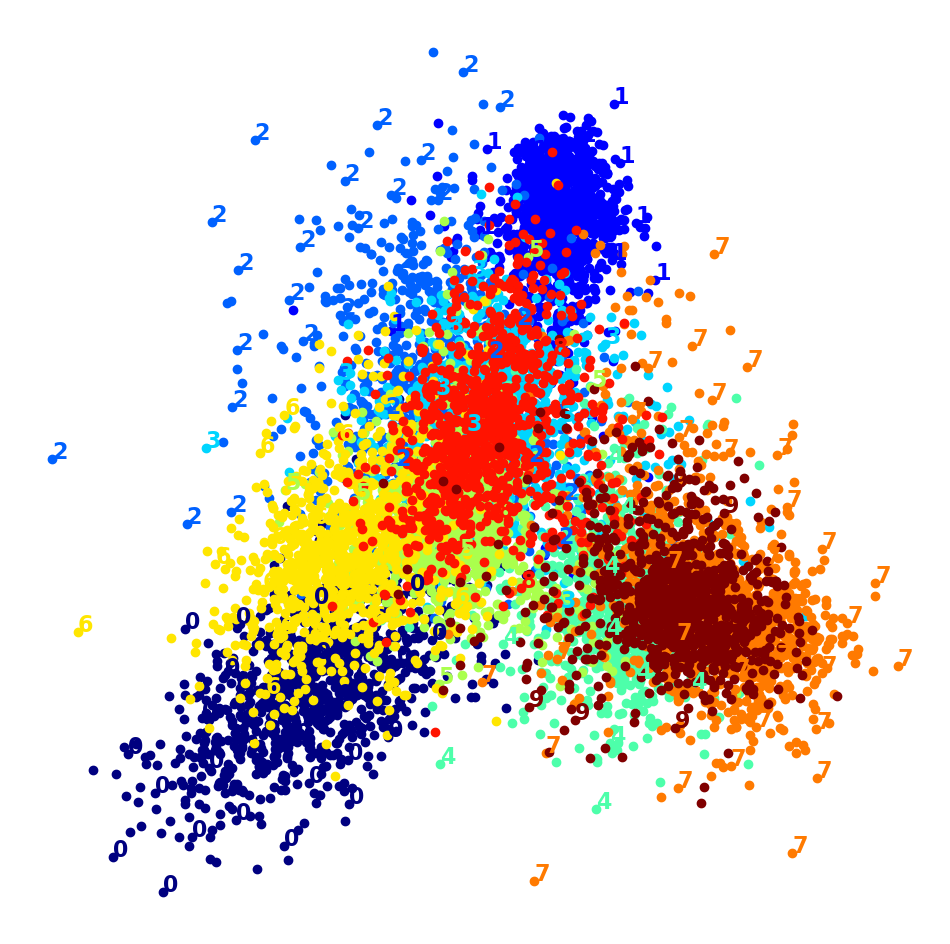

In [55]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

t0 = time.time()
X_lda_reduced = LinearDiscriminantAnalysis(n_components=2).fit_transform(X, y)
t1 = time.time()
print("LDA took {:.1f}s.".format(t1 - t0))
plot_digits(X_lda_reduced, y.astype(int), figsize=(12,12))
plt.show()

t-SNE took 166.5s.


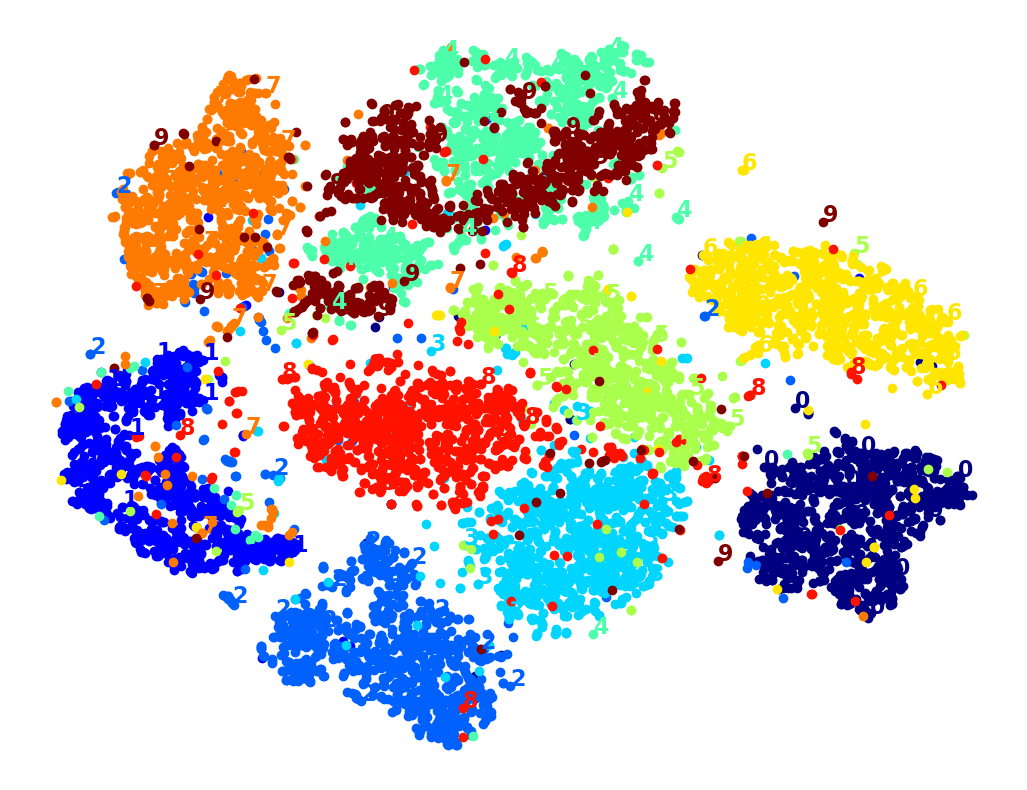

In [56]:
from sklearn.manifold import TSNE

t0 = time.time()
X_tsne_reduced = TSNE(n_components=2, random_state=42).fit_transform(X)
t1 = time.time()
print("t-SNE took {:.1f}s.".format(t1 - t0))
plot_digits(X_tsne_reduced, y.astype(int))
plt.show()

PCA+t-SNE took 168.5s.


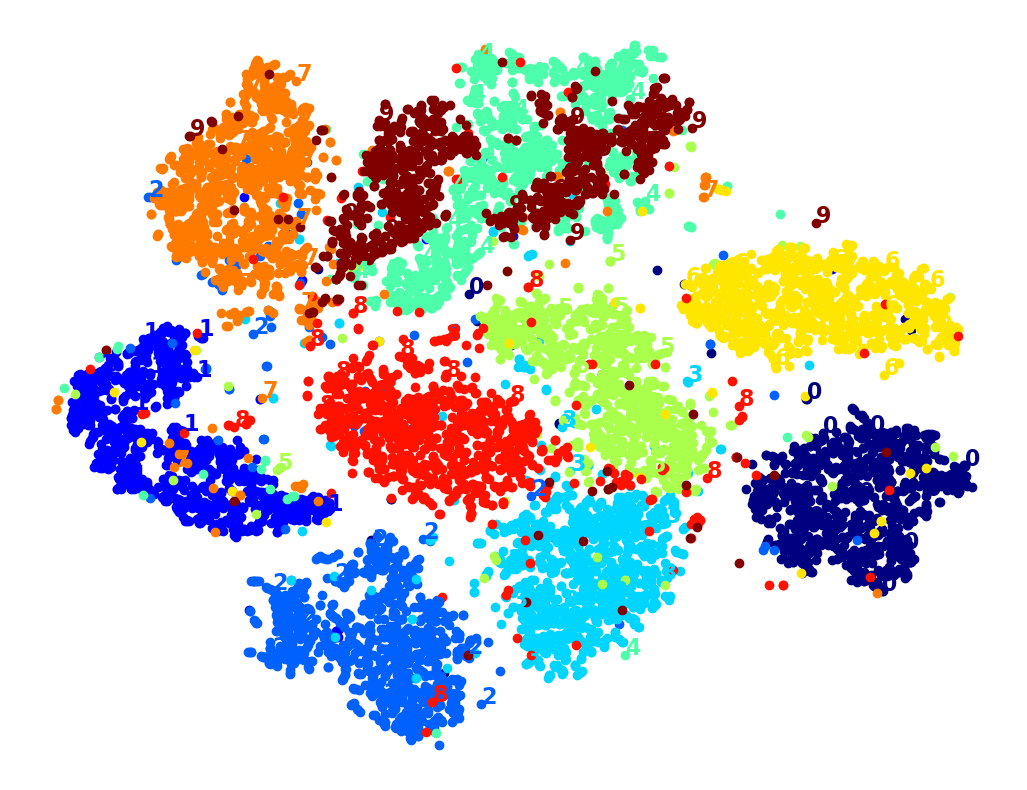

In [57]:
pca_tsne = Pipeline([
    ("pca", PCA(n_components=0.95, random_state=42)),
    ("tsne", TSNE(n_components=2, random_state=42)),
])
t0 = time.time()
X_pca_tsne_reduced = pca_tsne.fit_transform(X)
t1 = time.time()
print("PCA+t-SNE took {:.1f}s.".format(t1 - t0))
plot_digits(X_pca_tsne_reduced, y.astype(int))
plt.show()